# Data Exploration

## Import File and Set Conditions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# enter desired years of data
YEARS = [2020,2019,2018,2017,2016,2015,2014,2013,2012,2011]

data = pd.DataFrame()

for i in YEARS:  
    # low_memory=False eliminates a warning
    i_data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_' + str(i) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)

    # sort=True eliminates a warning and alphabetically sorts columns
    data = data.append(i_data, sort=True)

# give each row a unique index
data.reset_index(drop=True, inplace=True)

data.head()

,aborted_play,air_epa,air_wpa,air_yards,assist_tackle,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,...,xyac_median_yardage,xyac_success,yac_epa,yac_wpa,yardline_100,yards_after_catch,yards_gained,ydsnet,ydstogo,yrdln
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,ARI 35
1,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.0,NaN,0.0,41.0,0,ARI 35
2,0,-0.132787,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,...,2.0,0.619306,1.427625,0.033715,75.0,1.0,5.0,41.0,10,SF 25
3,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,55.0,NaN,14.0,41.0,10,SF 45
4,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,41.0,NaN,2.0,41.0,10,ARI 41


In [2]:
# model only focuses offensive 4th down plays
data['down'].value_counts()

1.0    162396
2.0    121007
3.0     77083
4.0     41145
Name: down, dtype: int64

In [3]:
data = data[data['down'] == 4.0]
data['down'].value_counts()

4.0    41145
Name: down, dtype: int64

In [4]:
# a special teams play converstion that is not a punt or kick could be considered a fake punt or kick
# these plays will not be considered conversion attempts for this model

data['special_teams_play'].value_counts()

1    35490
0     5655
Name: special_teams_play, dtype: int64

In [5]:
data = data[data['special_teams_play'] == 0]
data['special_teams_play'].value_counts()

0    5655
Name: special_teams_play, dtype: int64

In [6]:
data['play_type'].value_counts()

pass        3281
run         1685
no_play      640
qb_kneel      33
punt           3
Name: play_type, dtype: int64

In [7]:
# no play means a penalty and the conversion is tried again
# qb_kneel is to run the clock out and is not considered a conversion attempt in this model
# qb_spike is to stop the clock and is not considered a conversion attempt in this model
# offenses will fake a conversation and their qb will punt
# the model is not concerned with these plays

data = data[~(data['play_type'].isin(['no_play', 'qb_kneel', 'qb_spike', 'punt']))]
data['play_type'].value_counts()

pass    3281
run     1685
Name: play_type, dtype: int64

In [8]:
data['season_type'].value_counts()

REG     4727
POST     252
Name: season_type, dtype: int64

In [9]:
data = data[data['season_type'] == 'REG']
data['season_type'].value_counts()

REG    4727
Name: season_type, dtype: int64

## Drop Useless Columns

In [10]:
list(data)

['aborted_play',
 'air_epa',
 'air_wpa',
 'air_yards',
 'assist_tackle',
 'assist_tackle_1_player_id',
 'assist_tackle_1_player_name',
 'assist_tackle_1_team',
 'assist_tackle_2_player_id',
 'assist_tackle_2_player_name',
 'assist_tackle_2_team',
 'assist_tackle_3_player_id',
 'assist_tackle_3_player_name',
 'assist_tackle_3_team',
 'assist_tackle_4_player_id',
 'assist_tackle_4_player_name',
 'assist_tackle_4_team',
 'away_coach',
 'away_score',
 'away_team',
 'away_timeouts_remaining',
 'away_wp',
 'away_wp_post',
 'blocked_player_id',
 'blocked_player_name',
 'comp_air_epa',
 'comp_air_wpa',
 'comp_yac_epa',
 'comp_yac_wpa',
 'complete_pass',
 'cp',
 'cpoe',
 'def_wp',
 'defensive_extra_point_attempt',
 'defensive_extra_point_conv',
 'defensive_two_point_attempt',
 'defensive_two_point_conv',
 'defteam',
 'defteam_score',
 'defteam_score_post',
 'defteam_timeouts_remaining',
 'desc',
 'div_game',
 'down',
 'drive',
 'drive_end_transition',
 'drive_end_yard_line',
 'drive_ended_with_

In [11]:
df = data[['season', 'week', 'home_team', 'away_team', 'posteam_type', 'posteam', 'defteam', 'yardline_100', 
           'half_seconds_remaining', 'game_half', 'drive', 'qtr', 'down', 'goal_to_go', 'ydstogo', 'ydsnet', 'yards_gained', 
           'shotgun', 'no_huddle', 'qb_dropback', 'qb_scramble', 'pass_length', 'pass_location', 'air_yards', 
           'yards_after_catch', 'run_location', 'run_gap', 'timeout', 'timeout_team', 'posteam_timeouts_remaining', 
           'defteam_timeouts_remaining', 'score_differential', 'score_differential_post', 'no_score_prob', 'opp_td_prob', 
           'td_prob', 'ep', 'epa', 'wp', 'wpa', 'complete_pass', 'incomplete_pass', 'interception', 'tackled_for_loss', 
           'fumble_lost', 'qb_hit', 'sack', 'touchdown', 'pass_touchdown', 'rush_touchdown', 'fumble', 'series', 
           'drive_play_count', 'drive_inside20', 'div_game', 'stadium', 'surface', 'roof', 'pass', 'rush', 'success']].copy()

In [12]:
df.head(50)

,season,week,home_team,away_team,posteam_type,posteam,defteam,yardline_100,half_seconds_remaining,game_half,...,series,drive_play_count,drive_inside20,div_game,stadium,surface,roof,pass,rush,success
49,2020,1,SF,ARI,home,SF,ARI,1.0,757.0,Half1,...,16,10.0,1.0,1,Levi's Stadium,grass,outdoors,0.0,1.0,0.0
181,2020,1,SF,ARI,home,SF,ARI,16.0,37.0,Half2,...,62,12.0,1.0,1,Levi's Stadium,grass,outdoors,1.0,0.0,0.0
208,2020,1,DET,CHI,away,CHI,DET,34.0,1442.0,Half1,...,6,8.0,0.0,1,Ford Field,fieldturf,dome,1.0,0.0,0.0
323,2020,1,DET,CHI,away,CHI,DET,10.0,900.0,Half2,...,49,11.0,1.0,1,Ford Field,fieldturf,dome,0.0,1.0,1.0
511,2020,1,BAL,CLE,away,CLE,BAL,28.0,1088.0,Half2,...,46,10.0,0.0,1,M&T Bank Stadium,grass,outdoors,1.0,0.0,0.0
533,2020,1,BAL,CLE,away,CLE,BAL,48.0,611.0,Half2,...,54,7.0,0.0,1,M&T Bank Stadium,grass,outdoors,1.0,0.0,0.0
584,2020,1,LA,DAL,home,LA,DAL,41.0,1214.0,Half1,...,10,17.0,1.0,0,SoFi Stadium,matrixturf,dome,0.0,1.0,1.0
708,2020,1,LA,DAL,away,DAL,LA,11.0,706.0,Half2,...,54,9.0,1.0,0,SoFi Stadium,matrixturf,dome,1.0,0.0,0.0
737,2020,1,LA,DAL,away,DAL,LA,70.0,56.0,Half2,...,62,10.0,0.0,0,SoFi Stadium,matrixturf,dome,0.0,1.0,1.0
743,2020,1,LA,DAL,away,DAL,LA,76.0,13.0,Half2,...,63,10.0,0.0,0,SoFi Stadium,matrixturf,dome,1.0,0.0,0.0


In [13]:
df.describe()

,season,week,yardline_100,half_seconds_remaining,drive,qtr,down,goal_to_go,ydstogo,ydsnet,...,pass_touchdown,rush_touchdown,fumble,series,drive_play_count,drive_inside20,div_game,pass,rush,success
count,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.00000,4727.0,4727.000000,4727.000000,4727.000000,...,4716.000000,4716.000000,4716.000000,4727.000000,4727.000000,4727.000000,4727.000000,4716.000000,4727.000000,4713.000000
mean,2015.872858,9.408081,35.793738,545.254072,15.901417,3.22234,4.0,0.103871,4.472181,47.113603,...,0.056616,0.031807,0.026718,40.487413,9.341654,0.474297,0.386715,0.686599,0.312672,0.496923
std,2.921261,4.989363,21.631194,489.389464,7.147234,1.06271,0.0,0.305126,4.789653,25.669363,...,0.231131,0.175504,0.161274,17.447709,3.516999,0.499392,0.487049,0.463925,0.463631,0.500044
min,2011.000000,1.000000,1.000000,0.000000,1.000000,1.00000,4.0,0.000000,1.000000,-30.000000,...,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,5.000000,19.000000,120.000000,11.000000,2.00000,4.0,0.000000,1.000000,27.000000,...,0.000000,0.000000,0.000000,27.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,10.000000,36.000000,385.000000,17.000000,4.00000,4.0,0.000000,2.000000,49.000000,...,0.000000,0.000000,0.000000,46.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2019.000000,14.000000,50.000000,900.000000,21.000000,4.00000,4.0,0.000000,6.000000,70.000000,...,0.000000,0.000000,0.000000,54.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2020.000000,17.000000,97.000000,1800.000000,34.000000,5.00000,4.0,1.000000,43.000000,99.000000,...,1.000000,1.000000,1.000000,83.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df['posteam'].value_counts()

PHI    211
CLE    203
JAX    187
NYG    174
BAL    163
CHI    161
ATL    158
GB     157
WAS    154
CIN    154
HOU    151
IND    150
MIN    148
MIA    148
NYJ    145
LV     145
BUF    142
CAR    142
TB     140
SF     140
ARI    138
NO     137
DET    137
DAL    137
NE     136
LA     136
DEN    135
TEN    129
KC     121
LAC    119
SEA    116
PIT    113
Name: posteam, dtype: int64

In [15]:
df['defteam'].value_counts()

NE     188
KC     188
MIN    184
GB     182
NO     170
CHI    168
BAL    167
SF     163
TEN    161
PIT    156
ATL    151
CIN    151
DAL    150
MIA    148
NYG    148
PHI    147
LA     147
DEN    147
WAS    145
CLE    143
CAR    143
ARI    135
BUF    135
HOU    133
SEA    130
TB     129
DET    128
IND    123
NYJ    122
LAC    121
JAX    112
LV     112
Name: defteam, dtype: int64

## Feature Engineer Offensive and Defensive Rankings For Each Season

### Using data from The Football Database, individual rankings will be assigned to offensive and defensive teams for every season

In [16]:
def off_rank(i):
    if i['season'] == 2011:
        if i['posteam'] == 'NO':
            val = 1
        elif i['posteam'] == 'NE':
            val = 2
        elif i['posteam'] == 'GB':
            val = 3
        elif i['posteam'] == 'PHI':
            val = 4
        elif i['posteam'] == 'DET':
            val = 5
        elif i['posteam'] == 'LAC':
            val = 6
        elif i['posteam'] == 'CAR':
            val = 7
        elif i['posteam'] == 'NYG':
            val = 8
        elif i['posteam'] == 'LV':
            val = 9
        elif i['posteam'] == 'ATL':
            val = 10
        elif i['posteam'] == 'DAL':
            val = 11
        elif i['posteam'] == 'PIT':
            val = 12
        elif i['posteam'] == 'HOU':
            val = 13
        elif i['posteam'] == 'BUF':
            val = 14
        elif i['posteam'] == 'BAL':
            val = 15
        elif i['posteam'] == 'WAS':
            val = 16
        elif i['posteam'] == 'TEN':
            val = 17
        elif i['posteam'] == 'MIN':
            val = 18
        elif i['posteam'] == 'ARI':
            val = 19
        elif i['posteam'] == 'CIN':
            val = 20
        elif i['posteam'] == 'TB':
            val = 21
        elif i['posteam'] == 'MIA':
            val = 22
        elif i['posteam'] == 'DEN':
            val = 23
        elif i['posteam'] == 'CHI':
            val = 24
        elif i['posteam'] == 'NYJ':
            val = 25
        elif i['posteam'] == 'SF':
            val = 26
        elif i['posteam'] == 'KC':
            val = 27
        elif i['posteam'] == 'SEA':
            val = 28
        elif i['posteam'] == 'CLE':
            val = 29
        elif i['posteam'] == 'IND':
            val = 30
        elif i['posteam'] == 'LAR':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2012:
        if i['posteam'] == 'NE':
            val = 1
        elif i['posteam'] == 'NO':
            val = 2
        elif i['posteam'] == 'DET':
            val = 3
        elif i['posteam'] == 'DEN':
            val = 4
        elif i['posteam'] == 'WAS':
            val = 5
        elif i['posteam'] == 'DAL':
            val = 6
        elif i['posteam'] == 'HOU':
            val = 7
        elif i['posteam'] == 'ATL':
            val = 8
        elif i['posteam'] == 'TB':
            val = 9
        elif i['posteam'] == 'IND':
            val = 10
        elif i['posteam'] == 'SF':
            val = 11
        elif i['posteam'] == 'CAR':
            val = 12
        elif i['posteam'] == 'GB':
            val = 13
        elif i['posteam'] == 'NYG':
            val = 14
        elif i['posteam'] == 'PHI':
            val = 15
        elif i['posteam'] == 'BAL':
            val = 16
        elif i['posteam'] == 'SEA':
            val = 17
        elif i['posteam'] == 'LV':
            val = 18
        elif i['posteam'] == 'BUF':
            val = 19
        elif i['posteam'] == 'MIN':
            val = 20
        elif i['posteam'] == 'PIT':
            val = 21
        elif i['posteam'] == 'CIN':
            val = 22
        elif i['posteam'] == 'LAR':
            val = 23
        elif i['posteam'] == 'KC':
            val = 24
        elif i['posteam'] == 'CLE':
            val = 25
        elif i['posteam'] == 'TEN':
            val = 26
        elif i['posteam'] == 'MIA':
            val = 27
        elif i['posteam'] == 'CHI':
            val = 28
        elif i['posteam'] == 'JAX':
            val = 29
        elif i['posteam'] == 'NYJ':
            val = 30
        elif i['posteam'] == 'LAC':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2013:
        if i['posteam'] == 'DEN':
            val = 1
        elif i['posteam'] == 'PHI':
            val = 2
        elif i['posteam'] == 'GB':
            val = 3
        elif i['posteam'] == 'NO':
            val = 4
        elif i['posteam'] == 'LAC':
            val = 5
        elif i['posteam'] == 'DET':
            val = 6
        elif i['posteam'] == 'NE':
            val = 7
        elif i['posteam'] == 'CHI':
            val = 8
        elif i['posteam'] == 'WAS':
            val = 9
        elif i['posteam'] == 'CIN':
            val = 10
        elif i['posteam'] == 'HOU':
            val = 11
        elif i['posteam'] == 'ARI':
            val = 12
        elif i['posteam'] == 'MIN':
            val = 13
        elif i['posteam'] == 'ATL':
            val = 14
        elif i['posteam'] == 'IND':
            val = 15
        elif i['posteam'] == 'DAL':
            val = 16
        elif i['posteam'] == 'CLE':
            val = 17
        elif i['posteam'] == 'SEA':
            val = 18
        elif i['posteam'] == 'BUF':
            val = 19
        elif i['posteam'] == 'PIT':
            val = 20
        elif i['posteam'] == 'KC':
            val = 21
        elif i['posteam'] == 'TEN':
            val = 22
        elif i['posteam'] == 'LV':
            val = 23
        elif i['posteam'] == 'SF':
            val = 24
        elif i['posteam'] == 'NYJ':
            val = 25
        elif i['posteam'] == 'CAR':
            val = 26
        elif i['posteam'] == 'MIA':
            val = 27
        elif i['posteam'] == 'NYG':
            val = 28
        elif i['posteam'] == 'BAL':
            val = 29
        elif i['posteam'] == 'LAR':
            val = 30
        elif i['posteam'] == 'JAX':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2014:
        if i['posteam'] == 'NO':
            val = 1
        elif i['posteam'] == 'PIT':
            val = 2
        elif i['posteam'] == 'IND':
            val = 3
        elif i['posteam'] == 'DEN':
            val = 4
        elif i['posteam'] == 'PHI':
            val = 5
        elif i['posteam'] == 'GB':
            val = 6
        elif i['posteam'] == 'DAL':
            val = 7
        elif i['posteam'] == 'ATL':
            val = 8
        elif i['posteam'] == 'SEA':
            val = 9
        elif i['posteam'] == 'NYG':
            val = 10
        elif i['posteam'] == 'NE':
            val = 11
        elif i['posteam'] == 'BAL':
            val = 12
        elif i['posteam'] == 'WAS':
            val = 13
        elif i['posteam'] == 'MIA':
            val = 14
        elif i['posteam'] == 'CIN':
            val = 15
        elif i['posteam'] == 'CAR':
            val = 16
        elif i['posteam'] == 'HOU':
            val = 17
        elif i['posteam'] == 'LAC':
            val = 18
        elif i['posteam'] == 'DET':
            val = 19
        elif i['posteam'] == 'SF':
            val = 20
        elif i['posteam'] == 'CHI':
            val = 21
        elif i['posteam'] == 'NYJ':
            val = 22
        elif i['posteam'] == 'CLE':
            val = 23
        elif i['posteam'] == 'ARI':
            val = 24
        elif i['posteam'] == 'KC':
            val = 25
        elif i['posteam'] == 'BUF':
            val = 26
        elif i['posteam'] == 'MIN':
            val = 27
        elif i['posteam'] == 'LAR':
            val = 28
        elif i['posteam'] == 'TEN':
            val = 29
        elif i['posteam'] == 'TB':
            val = 30
        elif i['posteam'] == 'JAX':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2015:
        if i['posteam'] == 'ARI':
            val = 1
        elif i['posteam'] == 'NO':
            val = 2
        elif i['posteam'] == 'PIT':
            val = 3
        elif i['posteam'] == 'SEA':
            val = 4
        elif i['posteam'] == 'TB':
            val = 5
        elif i['posteam'] == 'NE':
            val = 6
        elif i['posteam'] == 'ATL':
            val = 7
        elif i['posteam'] == 'NYG':
            val = 8
        elif i['posteam'] == 'SEA':
            val = 9
        elif i['posteam'] == 'NYG':
            val = 10
        elif i['posteam'] == 'NE':
            val = 11
        elif i['posteam'] == 'BAL':
            val = 12
        elif i['posteam'] == 'WAS':
            val = 13
        elif i['posteam'] == 'MIA':
            val = 14
        elif i['posteam'] == 'CIN':
            val = 15
        elif i['posteam'] == 'CAR':
            val = 16
        elif i['posteam'] == 'HOU':
            val = 17
        elif i['posteam'] == 'LAC':
            val = 18
        elif i['posteam'] == 'DET':
            val = 19
        elif i['posteam'] == 'SF':
            val = 20
        elif i['posteam'] == 'CHI':
            val = 21
        elif i['posteam'] == 'NYJ':
            val = 22
        elif i['posteam'] == 'CLE':
            val = 23
        elif i['posteam'] == 'ARI':
            val = 24
        elif i['posteam'] == 'KC':
            val = 25
        elif i['posteam'] == 'BUF':
            val = 26
        elif i['posteam'] == 'MIN':
            val = 27
        elif i['posteam'] == 'LAR':
            val = 28
        elif i['posteam'] == 'TEN':
            val = 29
        elif i['posteam'] == 'TB':
            val = 30
        elif i['posteam'] == 'JAX':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2016:
        if i['posteam'] == 'NO':
            val = 1
        elif i['posteam'] == 'ATL':
            val = 2
        elif i['posteam'] == 'WAS':
            val = 3
        elif i['posteam'] == 'NE':
            val = 4
        elif i['posteam'] == 'DAL':
            val = 5
        elif i['posteam'] == 'LV':
            val = 6
        elif i['posteam'] == 'PIT':
            val = 7
        elif i['posteam'] == 'GB':
            val = 8
        elif i['posteam'] == 'ARI':
            val = 9
        elif i['posteam'] == 'IND':
            val = 10
        elif i['posteam'] == 'TEN':
            val = 11
        elif i['posteam'] == 'SEA':
            val = 12
        elif i['posteam'] == 'CIN':
            val = 13
        elif i['posteam'] == 'LAC':
            val = 14
        elif i['posteam'] == 'CHI':
            val = 15
        elif i['posteam'] == 'BUF':
            val = 16
        elif i['posteam'] == 'BAL':
            val = 17
        elif i['posteam'] == 'TB':
            val = 18
        elif i['posteam'] == 'CAR':
            val = 19
        elif i['posteam'] == 'KC':
            val = 20
        elif i['posteam'] == 'DET':
            val = 21
        elif i['posteam'] == 'PHI':
            val = 22
        elif i['posteam'] == 'JAX':
            val = 23
        elif i['posteam'] == 'MIA':
            val = 24
        elif i['posteam'] == 'NYG':
            val = 25
        elif i['posteam'] == 'NYJ':
            val = 26
        elif i['posteam'] == 'DEN':
            val = 27
        elif i['posteam'] == 'MIN':
            val = 28
        elif i['posteam'] == 'HOU':
            val = 29
        elif i['posteam'] == 'CLE':
            val = 30
        elif i['posteam'] == 'SF':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2017:
        if i['posteam'] == 'NE':
            val = 1
        elif i['posteam'] == 'NO':
            val = 2
        elif i['posteam'] == 'PIT':
            val = 3
        elif i['posteam'] == 'LAC':
            val = 4
        elif i['posteam'] == 'KC':
            val = 5
        elif i['posteam'] == 'JAX':
            val = 6
        elif i['posteam'] == 'PHI':
            val = 7
        elif i['posteam'] == 'ATL':
            val = 8
        elif i['posteam'] == 'TB':
            val = 9
        elif i['posteam'] == 'LAR':
            val = 10
        elif i['posteam'] == 'MIN':
            val = 11
        elif i['posteam'] == 'SF':
            val = 12
        elif i['posteam'] == 'DET':
            val = 13
        elif i['posteam'] == 'DAL':
            val = 14
        elif i['posteam'] == 'SEA':
            val = 15
        elif i['posteam'] == 'WAS':
            val = 16
        elif i['posteam'] == 'DEN':
            val = 17
        elif i['posteam'] == 'LV':
            val = 18
        elif i['posteam'] == 'CAR':
            val = 19
        elif i['posteam'] == 'HOU':
            val = 20
        elif i['posteam'] == 'NYG':
            val = 21
        elif i['posteam'] == 'ARI':
            val = 22
        elif i['posteam'] == 'TEN':
            val = 23
        elif i['posteam'] == 'CLE':
            val = 24
        elif i['posteam'] == 'MIA':
            val = 25
        elif i['posteam'] == 'GB':
            val = 26
        elif i['posteam'] == 'BAL':
            val = 27
        elif i['posteam'] == 'NYJ':
            val = 28
        elif i['posteam'] == 'BUF':
            val = 29
        elif i['posteam'] == 'CHI':
            val = 30
        elif i['posteam'] == 'IND':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2018:
        if i['posteam'] == 'KC':
            val = 1
        elif i['posteam'] == 'LAR':
            val = 2
        elif i['posteam'] == 'TB':
            val = 3
        elif i['posteam'] == 'PIT':
            val = 4
        elif i['posteam'] == 'NE':
            val = 5
        elif i['posteam'] == 'ATL':
            val = 6
        elif i['posteam'] == 'IND':
            val = 7
        elif i['posteam'] == 'NO':
            val = 8
        elif i['posteam'] == 'BAL':
            val = 9
        elif i['posteam'] == 'CAR':
            val = 10
        elif i['posteam'] == 'LAC':
            val = 11
        elif i['posteam'] == 'GB':
            val = 12
        elif i['posteam'] == 'CLE':
            val = 13
        elif i['posteam'] == 'PHI':
            val = 14
        elif i['posteam'] == 'HOU':
            val = 15
        elif i['posteam'] == 'SF':
            val = 16
        elif i['posteam'] == 'NYG':
            val = 17
        elif i['posteam'] == 'SEA':
            val = 18
        elif i['posteam'] == 'DEN':
            val = 19
        elif i['posteam'] == 'MIN':
            val = 20
        elif i['posteam'] == 'CHI':
            val = 21
        elif i['posteam'] == 'DAL':
            val = 22
        elif i['posteam'] == 'LV':
            val = 23
        elif i['posteam'] == 'DET':
            val = 24
        elif i['posteam'] == 'TEN':
            val = 25
        elif i['posteam'] == 'CIN':
            val = 26
        elif i['posteam'] == 'JAX':
            val = 27
        elif i['posteam'] == 'WAS':
            val = 28
        elif i['posteam'] == 'NYJ':
            val = 29
        elif i['posteam'] == 'BUF':
            val = 30
        elif i['posteam'] == 'MIA':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2019:
        if i['posteam'] == 'DAL':
            val = 1
        elif i['posteam'] == 'BAL':
            val = 2
        elif i['posteam'] == 'TB':
            val = 3
        elif i['posteam'] == 'SF':
            val = 4
        elif i['posteam'] == 'ATL':
            val = 5
        elif i['posteam'] == 'KC':
            val = 6
        elif i['posteam'] == 'LAR':
            val = 7
        elif i['posteam'] == 'SEA':
            val = 8
        elif i['posteam'] == 'NO':
            val = 9
        elif i['posteam'] == 'LAC':
            val = 10
        elif i['posteam'] == 'LV':
            val = 11
        elif i['posteam'] == 'TEN':
            val = 12
        elif i['posteam'] == 'HOU':
            val = 13
        elif i['posteam'] == 'PHI':
            val = 14
        elif i['posteam'] == 'NE':
            val = 15
        elif i['posteam'] == 'MIN':
            val = 16
        elif i['posteam'] == 'DET':
            val = 17
        elif i['posteam'] == 'GB':
            val = 18
        elif i['posteam'] == 'CAR':
            val = 19
        elif i['posteam'] == 'JAX':
            val = 20
        elif i['posteam'] == 'ARI':
            val = 21
        elif i['posteam'] == 'CLE':
            val = 22
        elif i['posteam'] == 'NYG':
            val = 23
        elif i['posteam'] == 'BUF':
            val = 24
        elif i['posteam'] == 'IND':
            val = 25
        elif i['posteam'] == 'CIN':
            val = 26
        elif i['posteam'] == 'MIA':
            val = 27
        elif i['posteam'] == 'DEN':
            val = 28
        elif i['posteam'] == 'CHI':
            val = 29
        elif i['posteam'] == 'PIT':
            val = 30
        elif i['posteam'] == 'WAS':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2020:
        if i['posteam'] == 'KC':
            val = 1
        elif i['posteam'] == 'BUF':
            val = 2
        elif i['posteam'] == 'TEN':
            val = 3
        elif i['posteam'] == 'MIN':
            val = 4
        elif i['posteam'] == 'GB':
            val = 5
        elif i['posteam'] == 'ARI':
            val = 6
        elif i['posteam'] == 'TB':
            val = 7
        elif i['posteam'] == 'LV':
            val = 8
        elif i['posteam'] == 'LAC':
            val = 9
        elif i['posteam'] == 'IND':
            val = 10
        elif i['posteam'] == 'LAR':
            val = 11
        elif i['posteam'] == 'NO':
            val = 12
        elif i['posteam'] == 'HOU':
            val = 13
        elif i['posteam'] == 'DAL':
            val = 14
        elif i['posteam'] == 'SF':
            val = 15
        elif i['posteam'] == 'CLE':
            val = 16
        elif i['posteam'] == 'SEA':
            val = 17
        elif i['posteam'] == 'ATL':
            val = 18
        elif i['posteam'] == 'BAL':
            val = 19
        elif i['posteam'] == 'DET':
            val = 20
        elif i['posteam'] == 'CAR':
            val = 21
        elif i['posteam'] == 'MIA':
            val = 22
        elif i['posteam'] == 'DEN':
            val = 23
        elif i['posteam'] == 'PHI':
            val = 24
        elif i['posteam'] == 'PIT':
            val = 25
        elif i['posteam'] == 'CHI':
            val = 26
        elif i['posteam'] == 'NE':
            val = 27
        elif i['posteam'] == 'JAX':
            val = 28
        elif i['posteam'] == 'CIN':
            val = 29
        elif i['posteam'] == 'WAS':
            val = 30
        elif i['posteam'] == 'NYG':
            val = 31
        else:
            val = 32
        return val
    else:
        return

In [17]:
df['off_rank'] = df.apply(off_rank, axis=1)

In [18]:
df['off_rank'].head(100)

49      15
181     15
208     26
323     26
511     16
        ..
7865    28
7992    10
8045    32
8146    31
8173    31
Name: off_rank, Length: 100, dtype: int64

In [19]:
df['off_rank'].unique()

array([15, 26, 16, 32, 14,  5,  4,  1, 13, 10,  9, 21, 27,  2, 24, 30, 31,
       25, 18, 17,  7, 12, 23,  3, 19, 22, 29, 20, 28,  8,  6, 11],
      dtype=int64)

In [20]:
def def_rank(i):
    if i['season'] == 2011:
        if i['defteam'] == 'PIT':
            val = 1
        elif i['defteam'] == 'HOU':
            val = 2
        elif i['defteam'] == 'BAL':
            val = 3
        elif i['defteam'] == 'SF':
            val = 4
        elif i['defteam'] == 'NYJ':
            val = 5
        elif i['defteam'] == 'JAX':
            val = 6
        elif i['defteam'] == 'CIN':
            val = 7
        elif i['defteam'] == 'PHI':
            val = 8
        elif i['defteam'] == 'SEA':
            val = 9
        elif i['defteam'] == 'CLE':
            val = 10
        elif i['defteam'] == 'KC':
            val = 11
        elif i['defteam'] == 'ATL':
            val = 12
        elif i['defteam'] == 'WAS':
            val = 13
        elif i['defteam'] == 'DAL':
            val = 14
        elif i['defteam'] == 'MIA':
            val = 15
        elif i['defteam'] == 'LAC':
            val = 16
        elif i['defteam'] == 'CHI':
            val = 17
        elif i['defteam'] == 'ARI':
            val = 18
        elif i['defteam'] == 'TEN':
            val = 19
        elif i['defteam'] == 'DEN':
            val = 20
        elif i['defteam'] == 'MIN':
            val = 21
        elif i['defteam'] == 'LAR':
            val = 22
        elif i['defteam'] == 'DET':
            val = 23
        elif i['defteam'] == 'NO':
            val = 24
        elif i['defteam'] == 'IND':
            val = 25
        elif i['defteam'] == 'BUF':
            val = 26
        elif i['defteam'] == 'NYG':
            val = 27
        elif i['defteam'] == 'CAR':
            val = 28
        elif i['defteam'] == 'LV':
            val = 29
        elif i['defteam'] == 'TB':
            val = 30
        elif i['defteam'] == 'NE':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2012:
        if i['defteam'] == 'PIT':
            val = 1
        elif i['defteam'] == 'DEN':
            val = 2
        elif i['defteam'] == 'SF':
            val = 3
        elif i['defteam'] == 'SEA':
            val = 4
        elif i['defteam'] == 'CHI':
            val = 5
        elif i['defteam'] == 'CIN':
            val = 6
        elif i['defteam'] == 'HOU':
            val = 7
        elif i['defteam'] == 'NYJ':
            val = 8
        elif i['defteam'] == 'LAC':
            val = 9
        elif i['defteam'] == 'CAR':
            val = 10
        elif i['defteam'] == 'GB':
            val = 11
        elif i['defteam'] == 'ARI':
            val = 12
        elif i['defteam'] == 'DET':
            val = 13
        elif i['defteam'] == 'LAR':
            val = 14
        elif i['defteam'] == 'PHI':
            val = 15
        elif i['defteam'] == 'MIN':
            val = 16
        elif i['defteam'] == 'BAL':
            val = 17
        elif i['defteam'] == 'LV':
            val = 18
        elif i['defteam'] == 'DAL':
            val = 19
        elif i['defteam'] == 'KC':
            val = 20
        elif i['defteam'] == 'MIA':
            val = 21
        elif i['defteam'] == 'BUF':
            val = 22
        elif i['defteam'] == 'CLE':
            val = 23
        elif i['defteam'] == 'ATL':
            val = 24
        elif i['defteam'] == 'NE':
            val = 25
        elif i['defteam'] == 'IND':
            val = 26
        elif i['defteam'] == 'TEN':
            val = 27
        elif i['defteam'] == 'WAS':
            val = 28
        elif i['defteam'] == 'TB':
            val = 29
        elif i['defteam'] == 'JAX':
            val = 30
        elif i['defteam'] == 'NYG':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2013:
        if i['defteam'] == 'SEA':
            val = 1
        elif i['defteam'] == 'CAR':
            val = 2
        elif i['defteam'] == 'CIN':
            val = 3
        elif i['defteam'] == 'NO':
            val = 4
        elif i['defteam'] == 'SF':
            val = 5
        elif i['defteam'] == 'ARI':
            val = 6
        elif i['defteam'] == 'HOU':
            val = 7
        elif i['defteam'] == 'NYG':
            val = 8
        elif i['defteam'] == 'CLE':
            val = 9
        elif i['defteam'] == 'BUF':
            val = 10
        elif i['defteam'] == 'NYJ':
            val = 11
        elif i['defteam'] == 'BAL':
            val = 12
        elif i['defteam'] == 'PIT':
            val = 13
        elif i['defteam'] == 'TEN':
            val = 14
        elif i['defteam'] == 'LAR':
            val = 15
        elif i['defteam'] == 'DET':
            val = 16
        elif i['defteam'] == 'TB':
            val = 17
        elif i['defteam'] == 'WAS':
            val = 18
        elif i['defteam'] == 'DEN':
            val = 19
        elif i['defteam'] == 'IND':
            val = 20
        elif i['defteam'] == 'MIA':
            val = 21
        elif i['defteam'] == 'LV':
            val = 22
        elif i['defteam'] == 'LAC':
            val = 23
        elif i['defteam'] == 'KC':
            val = 24
        elif i['defteam'] == 'GB':
            val = 25
        elif i['defteam'] == 'NE':
            val = 26
        elif i['defteam'] == 'ATL':
            val = 27
        elif i['defteam'] == 'JAX':
            val = 28
        elif i['defteam'] == 'PHI':
            val = 29
        elif i['defteam'] == 'CHI':
            val = 30
        elif i['defteam'] == 'MIN':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2014:
        if i['defteam'] == 'SEA':
            val = 1
        elif i['defteam'] == 'DET':
            val = 2
        elif i['defteam'] == 'DEN':
            val = 3
        elif i['defteam'] == 'BUF':
            val = 4
        elif i['defteam'] == 'SF':
            val = 5
        elif i['defteam'] == 'NYJ':
            val = 6
        elif i['defteam'] == 'KC':
            val = 7
        elif i['defteam'] == 'BAL':
            val = 8
        elif i['defteam'] == 'LAC':
            val = 9
        elif i['defteam'] == 'CAR':
            val = 10
        elif i['defteam'] == 'IND':
            val = 11
        elif i['defteam'] == 'MIA':
            val = 12
        elif i['defteam'] == 'NE':
            val = 13
        elif i['defteam'] == 'MIN':
            val = 14
        elif i['defteam'] == 'GB':
            val = 15
        elif i['defteam'] == 'HOU':
            val = 16
        elif i['defteam'] == 'LAR':
            val = 17
        elif i['defteam'] == 'PIT':
            val = 18
        elif i['defteam'] == 'DAL':
            val = 19
        elif i['defteam'] == 'WAS':
            val = 20
        elif i['defteam'] == 'LV':
            val = 21
        elif i['defteam'] == 'CIN':
            val = 22
        elif i['defteam'] == 'CLE':
            val = 23
        elif i['defteam'] == 'ARI':
            val = 24
        elif i['defteam'] == 'TB':
            val = 25
        elif i['defteam'] == 'JAX':
            val = 26
        elif i['defteam'] == 'TEN':
            val = 27
        elif i['defteam'] == 'PHI':
            val = 28
        elif i['defteam'] == 'NYG':
            val = 29
        elif i['defteam'] == 'CHI':
            val = 30
        elif i['defteam'] == 'NO':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2015:
        if i['defteam'] == 'DEN':
            val = 1
        elif i['defteam'] == 'SEA':
            val = 2
        elif i['defteam'] == 'HOU':
            val = 3
        elif i['defteam'] == 'NYJ':
            val = 4
        elif i['defteam'] == 'ARI':
            val = 5
        elif i['defteam'] == 'CAR':
            val = 6
        elif i['defteam'] == 'KC':
            val = 7
        elif i['defteam'] == 'BAL':
            val = 8
        elif i['defteam'] == 'NE':
            val = 9
        elif i['defteam'] == 'TB':
            val = 10
        elif i['defteam'] == 'CIN':
            val = 11
        elif i['defteam'] == 'TEN':
            val = 12
        elif i['defteam'] == 'MIN':
            val = 13
        elif i['defteam'] == 'CHI':
            val = 14
        elif i['defteam'] == 'GB':
            val = 15
        elif i['defteam'] == 'ATL':
            val = 16
        elif i['defteam'] == 'DAL':
            val = 17
        elif i['defteam'] == 'DET':
            val = 18
        elif i['defteam'] == 'BUF':
            val = 19
        elif i['defteam'] == 'LAC':
            val = 20
        elif i['defteam'] == 'PIT':
            val = 21
        elif i['defteam'] == 'LV':
            val = 22
        elif i['defteam'] == 'LAR':
            val = 23
        elif i['defteam'] == 'JAX':
            val = 24
        elif i['defteam'] == 'MIA':
            val = 25
        elif i['defteam'] == 'IND':
            val = 26
        elif i['defteam'] == 'CLE':
            val = 27
        elif i['defteam'] == 'WAS':
            val = 28
        elif i['defteam'] == 'SF':
            val = 29
        elif i['defteam'] == 'PHI':
            val = 30
        elif i['defteam'] == 'NO':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2016:
        if i['defteam'] == 'HOU':
            val = 1
        elif i['defteam'] == 'ARI':
            val = 2
        elif i['defteam'] == 'MIN':
            val = 3
        elif i['defteam'] == 'DEN':
            val = 4
        elif i['defteam'] == 'SEA':
            val = 5
        elif i['defteam'] == 'JAX':
            val = 6
        elif i['defteam'] == 'BAL':
            val = 7
        elif i['defteam'] == 'NE':
            val = 8
        elif i['defteam'] == 'LAR':
            val = 9
        elif i['defteam'] == 'NYG':
            val = 10
        elif i['defteam'] == 'NYJ':
            val = 11
        elif i['defteam'] == 'PIT':
            val = 12
        elif i['defteam'] == 'PHI':
            val = 13
        elif i['defteam'] == 'DAL':
            val = 14
        elif i['defteam'] == 'CHI':
            val = 15
        elif i['defteam'] == 'LAC':
            val = 16
        elif i['defteam'] == 'CIN':
            val = 17
        elif i['defteam'] == 'DET':
            val = 18
        elif i['defteam'] == 'BUF':
            val = 19
        elif i['defteam'] == 'TEN':
            val = 20
        elif i['defteam'] == 'CAR':
            val = 21
        elif i['defteam'] == 'GB':
            val = 22
        elif i['defteam'] == 'TB':
            val = 23
        elif i['defteam'] == 'KC':
            val = 24
        elif i['defteam'] == 'ATL':
            val = 25
        elif i['defteam'] == 'LV':
            val = 26
        elif i['defteam'] == 'NO':
            val = 27
        elif i['defteam'] == 'WAS':
            val = 28
        elif i['defteam'] == 'MIA':
            val = 29
        elif i['defteam'] == 'IND':
            val = 30
        elif i['defteam'] == 'CLE':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2017:
        if i['defteam'] == 'MIN':
            val = 1
        elif i['defteam'] == 'JAX':
            val = 2
        elif i['defteam'] == 'DEN':
            val = 3
        elif i['defteam'] == 'PHI':
            val = 4
        elif i['defteam'] == 'PIT':
            val = 5
        elif i['defteam'] == 'ARI':
            val = 6
        elif i['defteam'] == 'CAR':
            val = 7
        elif i['defteam'] == 'DAL':
            val = 8
        elif i['defteam'] == 'ATL':
            val = 9
        elif i['defteam'] == 'CHI':
            val = 10
        elif i['defteam'] == 'SEA':
            val = 11
        elif i['defteam'] == 'BAL':
            val = 12
        elif i['defteam'] == 'TEN':
            val = 13
        elif i['defteam'] == 'CLE':
            val = 14
        elif i['defteam'] == 'LAC':
            val = 15
        elif i['defteam'] == 'MIA':
            val = 16
        elif i['defteam'] == 'NO':
            val = 17
        elif i['defteam'] == 'CIN':
            val = 18
        elif i['defteam'] == 'LAR':
            val = 19
        elif i['defteam'] == 'HOU':
            val = 20
        elif i['defteam'] == 'WAS':
            val = 21
        elif i['defteam'] == 'GB':
            val = 22
        elif i['defteam'] == 'LV':
            val = 23
        elif i['defteam'] == 'SF':
            val = 24
        elif i['defteam'] == 'NYJ':
            val = 25
        elif i['defteam'] == 'BUF':
            val = 26
        elif i['defteam'] == 'DET':
            val = 27
        elif i['defteam'] == 'KC':
            val = 28
        elif i['defteam'] == 'NE':
            val = 29
        elif i['defteam'] == 'IND':
            val = 30
        elif i['defteam'] == 'NYG':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2018:
        if i['defteam'] == 'BAL':
            val = 1
        elif i['defteam'] == 'BUF':
            val = 2
        elif i['defteam'] == 'CHI':
            val = 3
        elif i['defteam'] == 'MIN':
            val = 4
        elif i['defteam'] == 'JAX':
            val = 5
        elif i['defteam'] == 'PIT':
            val = 6
        elif i['defteam'] == 'DAL':
            val = 7
        elif i['defteam'] == 'TEN':
            val = 8
        elif i['defteam'] == 'LAC':
            val = 9
        elif i['defteam'] == 'DET':
            val = 10
        elif i['defteam'] == 'IND':
            val = 11
        elif i['defteam'] == 'HOU':
            val = 12
        elif i['defteam'] == 'SF':
            val = 13
        elif i['defteam'] == 'NO':
            val = 14
        elif i['defteam'] == 'CAR':
            val = 15
        elif i['defteam'] == 'SEA':
            val = 16
        elif i['defteam'] == 'WAS':
            val = 17
        elif i['defteam'] == 'GB':
            val = 18
        elif i['defteam'] == 'LAR':
            val = 19
        elif i['defteam'] == 'ARI':
            val = 20
        elif i['defteam'] == 'NE':
            val = 21
        elif i['defteam'] == 'DEN':
            val = 22
        elif i['defteam'] == 'PHI':
            val = 23
        elif i['defteam'] == 'NYG':
            val = 24
        elif i['defteam'] == 'NYJ':
            val = 25
        elif i['defteam'] == 'LV':
            val = 26
        elif i['defteam'] == 'TB':
            val = 27
        elif i['defteam'] == 'ATL':
            val = 28
        elif i['defteam'] == 'MIA':
            val = 29
        elif i['defteam'] == 'CLE':
            val = 30
        elif i['defteam'] == 'KC':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2019:
        if i['defteam'] == 'NE':
            val = 1
        elif i['defteam'] == 'SF':
            val = 2
        elif i['defteam'] == 'BUF':
            val = 3
        elif i['defteam'] == 'BAL':
            val = 4
        elif i['defteam'] == 'PIT':
            val = 5
        elif i['defteam'] == 'LAC':
            val = 6
        elif i['defteam'] == 'NYJ':
            val = 7
        elif i['defteam'] == 'CHI':
            val = 8
        elif i['defteam'] == 'DAL':
            val = 9
        elif i['defteam'] == 'PHI':
            val = 10
        elif i['defteam'] == 'NO':
            val = 11
        elif i['defteam'] == 'LAR':
            val = 12
        elif i['defteam'] == 'MIN':
            val = 13
        elif i['defteam'] == 'TB':
            val = 14
        elif i['defteam'] == 'IND':
            val = 15
        elif i['defteam'] == 'KC':
            val = 16
        elif i['defteam'] == 'GB':
            val = 17
        elif i['defteam'] == 'LV':
            val = 18
        elif i['defteam'] == 'ATL':
            val = 19
        elif i['defteam'] == 'TEN':
            val = 20
        elif i['defteam'] == 'CLE':
            val = 21
        elif i['defteam'] == 'CAR':
            val = 22
        elif i['defteam'] == 'JAX':
            val = 23
        elif i['defteam'] == 'NYG':
            val = 24
        elif i['defteam'] == 'SEA':
            val = 25
        elif i['defteam'] == 'WAS':
            val = 26
        elif i['defteam'] == 'HOU':
            val = 27
        elif i['defteam'] == 'CIN':
            val = 28
        elif i['defteam'] == 'MIA':
            val = 29
        elif i['defteam'] == 'IND':
            val = 30
        elif i['defteam'] == 'DET':
            val = 31
        else:
            val = 32
        return val
    elif i['season'] == 2020:
        if i['defteam'] == 'LAR':
            val = 1
        elif i['defteam'] == 'WAS':
            val = 2
        elif i['defteam'] == 'PIT':
            val = 3
        elif i['defteam'] == 'NO':
            val = 4
        elif i['defteam'] == 'SF':
            val = 5
        elif i['defteam'] == 'TB':
            val = 6
        elif i['defteam'] == 'BAL':
            val = 7
        elif i['defteam'] == 'IND':
            val = 8
        elif i['defteam'] == 'GB':
            val = 9
        elif i['defteam'] == 'LAC':
            val = 10
        elif i['defteam'] == 'CHI':
            val = 11
        elif i['defteam'] == 'NYG':
            val = 12
        elif i['defteam'] == 'ARI':
            val = 13
        elif i['defteam'] == 'BUF':
            val = 14
        elif i['defteam'] == 'NE':
            val = 15
        elif i['defteam'] == 'KC':
            val = 16
        elif i['defteam'] == 'CLE':
            val = 17
        elif i['defteam'] == 'CAR':
            val = 18
        elif i['defteam'] == 'PHI':
            val = 19
        elif i['defteam'] == 'MIA':
            val = 20
        elif i['defteam'] == 'DEN':
            val = 21
        elif i['defteam'] == 'SEA':
            val = 22
        elif i['defteam'] == 'DAL':
            val = 23
        elif i['defteam'] == 'NYJ':
            val = 24
        elif i['defteam'] == 'LV':
            val = 25
        elif i['defteam'] == 'CIN':
            val = 26
        elif i['defteam'] == 'MIN':
            val = 27
        elif i['defteam'] == 'TEN':
            val = 28
        elif i['defteam'] == 'ATL':
            val = 29
        elif i['defteam'] == 'HOU':
            val = 30
        elif i['defteam'] == 'JAX':
            val = 31
        else:
            val = 32
        return val
    else:
        return

In [21]:
df['def_rank'] = df.apply(def_rank, axis=1)

In [22]:
df['def_rank'].head(100)

49      13
181     13
208     32
323     32
511      7
        ..
7865    20
7992    24
8045     8
8146     5
8173     5
Name: def_rank, Length: 100, dtype: int64

In [23]:
df['def_rank'].unique()

array([13, 32,  7, 23, 27,  9, 30, 16, 31, 26, 25, 20, 24,  2, 19,  3, 12,
       22, 29,  4,  6, 28, 21, 14, 17, 10, 11,  5,  8, 18, 15,  1],
      dtype=int64)

## EDA Visualizations

### Drop columns that are no longer needed

In [24]:
df = df.drop(['season', 'week', 'home_team', 'away_team', 'posteam', 'defteam', 'yards_gained', 'timeout_team', 
              'score_differential_post', 'no_score_prob', 'epa', 'wpa', 'complete_pass', 'incomplete_pass', 'interception', 
              'tackled_for_loss', 'fumble_lost', 'qb_hit', 'sack', 'touchdown', 'pass_touchdown', 'rush_touchdown', 'fumble', 
              'stadium'], axis=1)

In [25]:
df.columns

Index(['posteam_type', 'yardline_100', 'half_seconds_remaining', 'game_half',
       'drive', 'qtr', 'down', 'goal_to_go', 'ydstogo', 'ydsnet', 'shotgun',
       'no_huddle', 'qb_dropback', 'qb_scramble', 'pass_length',
       'pass_location', 'air_yards', 'yards_after_catch', 'run_location',
       'run_gap', 'timeout', 'posteam_timeouts_remaining',
       'defteam_timeouts_remaining', 'score_differential', 'opp_td_prob',
       'td_prob', 'ep', 'wp', 'series', 'drive_play_count', 'drive_inside20',
       'div_game', 'surface', 'roof', 'pass', 'rush', 'success', 'off_rank',
       'def_rank'],
      dtype='object')

### Find and replace/drop null values

In [26]:
df.isnull().sum()

posteam_type                     0
yardline_100                     0
half_seconds_remaining           0
game_half                        0
drive                            0
qtr                              0
down                             0
goal_to_go                       0
ydstogo                          0
ydsnet                           0
shotgun                          0
no_huddle                        0
qb_dropback                     11
qb_scramble                      0
pass_length                   1847
pass_location                 1847
air_yards                     1845
yards_after_catch             3216
run_location                  3141
run_gap                       3844
timeout                         11
posteam_timeouts_remaining       0
defteam_timeouts_remaining       0
score_differential               0
opp_td_prob                      0
td_prob                          0
ep                               0
wp                               0
series              

In [27]:
# null values in these columns mean the value should be zero
df[['pass_length', 'pass_location', 'run_location', 'run_gap']] = df[['pass_length', 'pass_location', 
                                                                      'run_location', 'run_gap']].fillna(0)

In [28]:
# remaining values are unknown
# mean, median and mode will not work
# rows should be dropped
df = df.dropna()

# check results
df.isnull().sum()

posteam_type                  0
yardline_100                  0
half_seconds_remaining        0
game_half                     0
drive                         0
qtr                           0
down                          0
goal_to_go                    0
ydstogo                       0
ydsnet                        0
shotgun                       0
no_huddle                     0
qb_dropback                   0
qb_scramble                   0
pass_length                   0
pass_location                 0
air_yards                     0
yards_after_catch             0
run_location                  0
run_gap                       0
timeout                       0
posteam_timeouts_remaining    0
defteam_timeouts_remaining    0
score_differential            0
opp_td_prob                   0
td_prob                       0
ep                            0
wp                            0
series                        0
drive_play_count              0
drive_inside20                0
div_game

In [29]:
df.head()

,posteam_type,yardline_100,half_seconds_remaining,game_half,drive,qtr,down,goal_to_go,ydstogo,ydsnet,...,drive_play_count,drive_inside20,div_game,surface,roof,pass,rush,success,off_rank,def_rank
708,away,11.0,706.0,Half2,16.0,4,4.0,0,3,56.0,...,9.0,1.0,0,matrixturf,dome,1.0,0.0,0.0,14,32
1057,away,34.0,504.0,Half2,14.0,4,4.0,0,8,75.0,...,10.0,1.0,0,astroturf,outdoors,1.0,0.0,1.0,13,16
1183,away,62.0,1589.0,Half2,12.0,3,4.0,0,1,59.0,...,11.0,1.0,1,grass,outdoors,1.0,0.0,1.0,10,31
2271,home,36.0,1335.0,Half2,16.0,3,4.0,0,1,87.0,...,19.0,1.0,0,fieldturf,outdoors,1.0,0.0,1.0,31,3
2443,away,38.0,1489.0,Half2,12.0,3,4.0,0,5,75.0,...,10.0,0.0,0,fieldturf,closed,1.0,0.0,1.0,17,29


# Build the Model

### Create dummy variables to account for categorical values

In [30]:
df.dtypes

posteam_type                   object
yardline_100                  float64
half_seconds_remaining        float64
game_half                      object
drive                         float64
qtr                             int64
down                          float64
goal_to_go                      int64
ydstogo                         int64
ydsnet                        float64
shotgun                         int64
no_huddle                       int64
qb_dropback                   float64
qb_scramble                     int64
pass_length                    object
pass_location                  object
air_yards                     float64
yards_after_catch             float64
run_location                   object
run_gap                        object
timeout                       float64
posteam_timeouts_remaining    float64
defteam_timeouts_remaining    float64
score_differential            float64
opp_td_prob                   float64
td_prob                       float64
ep          

In [31]:
dummy_postype = pd.get_dummies(df['posteam_type'])
dummy_postype.head()

,away,home
708,1,0
1057,1,0
1183,1,0
2271,0,1
2443,1,0


In [32]:
dummy_half = pd.get_dummies(df['game_half'])
dummy_half.head()

,Half1,Half2,Overtime
708,0,1,0
1057,0,1,0
1183,0,1,0
2271,0,1,0
2443,0,1,0


In [33]:
dummy_pass_length = pd.get_dummies(df['pass_length'])
dummy_pass_length.head()

,deep,short
708,0,1
1057,0,1
1183,0,1
2271,0,1
2443,1,0


In [34]:
dummy_pass_loc = pd.get_dummies(df['pass_location'])
dummy_pass_loc.head()

,left,middle,right
708,0,0,1
1057,1,0,0
1183,0,0,1
2271,1,0,0
2443,1,0,0


In [35]:
dummy_run_loc = pd.get_dummies(df['run_location'])
dummy_run_loc.head()

,0
708,1
1057,1
1183,1
2271,1
2443,1


In [36]:
dummy_run_gap = pd.get_dummies(df['run_gap'])
dummy_run_gap.head()

,0
708,1
1057,1
1183,1
2271,1
2443,1


In [37]:
dummy_surface = pd.get_dummies(df['surface'])
dummy_surface.head(10)

,a_turf,astroplay,astroturf,fieldturf,fieldturf,grass,matrixturf,sportturf
708,0,0,0,0,0,0,1,0
1057,0,0,1,0,0,0,0,0
1183,0,0,0,0,0,1,0,0
2271,0,0,0,0,1,0,0,0
2443,0,0,0,1,0,0,0,0
2702,0,0,1,0,0,0,0,0
2784,0,0,0,0,0,1,0,0
2845,0,0,0,0,0,1,0,0
3045,0,0,0,1,0,0,0,0
3654,0,0,0,0,0,1,0,0


In [38]:
dummy_roof = pd.get_dummies(df['roof'])
dummy_roof.head()

,closed,dome,open,outdoors
708,0,1,0,0
1057,0,0,0,1
1183,0,0,0,1
2271,0,0,0,1
2443,1,0,0,0


In [39]:
df = df.merge(dummy_postype, left_index=True, right_index=True)
df = df.merge(dummy_half, left_index=True, right_index=True)
df = df.merge(dummy_pass_length, left_index=True, right_index=True)
df = df.merge(dummy_pass_loc, left_index=True, right_index=True)
df = df.merge(dummy_run_loc, left_index=True, right_index=True)
df = df.merge(dummy_run_gap, left_index=True, right_index=True)
df = df.merge(dummy_surface, left_index=True, right_index=True)
df = df.merge(dummy_roof, left_index=True, right_index=True)
df.head()

,posteam_type,yardline_100,half_seconds_remaining,game_half,drive,qtr,down,goal_to_go,ydstogo,ydsnet,...,astroturf,fieldturf,fieldturf,grass,matrixturf,sportturf,closed,dome,open,outdoors
708,away,11.0,706.0,Half2,16.0,4,4.0,0,3,56.0,...,0,0,0,0,1,0,0,1,0,0
1057,away,34.0,504.0,Half2,14.0,4,4.0,0,8,75.0,...,1,0,0,0,0,0,0,0,0,1
1183,away,62.0,1589.0,Half2,12.0,3,4.0,0,1,59.0,...,0,0,0,1,0,0,0,0,0,1
2271,home,36.0,1335.0,Half2,16.0,3,4.0,0,1,87.0,...,0,0,1,0,0,0,0,0,0,1
2443,away,38.0,1489.0,Half2,12.0,3,4.0,0,5,75.0,...,0,1,0,0,0,0,1,0,0,0


In [40]:
df = df.drop(['posteam_type', 'game_half', 'pass_length', 'pass_location', 'run_location', 'run_gap', 'surface', 'roof'], axis=1)
df.dtypes

yardline_100                  float64
half_seconds_remaining        float64
drive                         float64
qtr                             int64
down                          float64
goal_to_go                      int64
ydstogo                         int64
ydsnet                        float64
shotgun                         int64
no_huddle                       int64
qb_dropback                   float64
qb_scramble                     int64
air_yards                     float64
yards_after_catch             float64
timeout                       float64
posteam_timeouts_remaining    float64
defteam_timeouts_remaining    float64
score_differential            float64
opp_td_prob                   float64
td_prob                       float64
ep                            float64
wp                            float64
series                          int64
drive_play_count              float64
drive_inside20                float64
div_game                        int64
pass        

## Build the Baseline with a Decision Tree

### Import Libraries and Test Data

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [42]:
#create numpy arrays for predictors and target variables 
X = df.drop('success', axis=1).values
y = df['success'].values

In [43]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [44]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [45]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [46]:
print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, y_pred))

----------------------------------------
Accuracy Score:
0.8852097130242825
----------------------------------------
Confusion Matrix:
[[ 44  30]
 [ 22 357]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

         0.0       0.67      0.59      0.63        74
         1.0       0.92      0.94      0.93       379

    accuracy                           0.89       453
   macro avg       0.79      0.77      0.78       453
weighted avg       0.88      0.89      0.88       453



In [47]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(44, 30, 22, 357)

In [48]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_pred) * 100))

Testing Accuracy for Decision Tree Classifier: 88.52%


### Feature Selection

In [49]:
# Feature importance
top_feats = clf.feature_importances_
top_feats

array([0.01523884, 0.05352293, 0.00752535, 0.        , 0.        ,
       0.        , 0.09796656, 0.1042935 , 0.        , 0.        ,
       0.        , 0.        , 0.1906809 , 0.14593854, 0.        ,
       0.00957305, 0.        , 0.01069128, 0.03218498, 0.01636476,
       0.02292056, 0.06956728, 0.0069666 , 0.14876242, 0.01751736,
       0.        , 0.        , 0.        , 0.02464632, 0.00875376,
       0.00592622, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00338641, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00757239, 0.        , 0.        ])

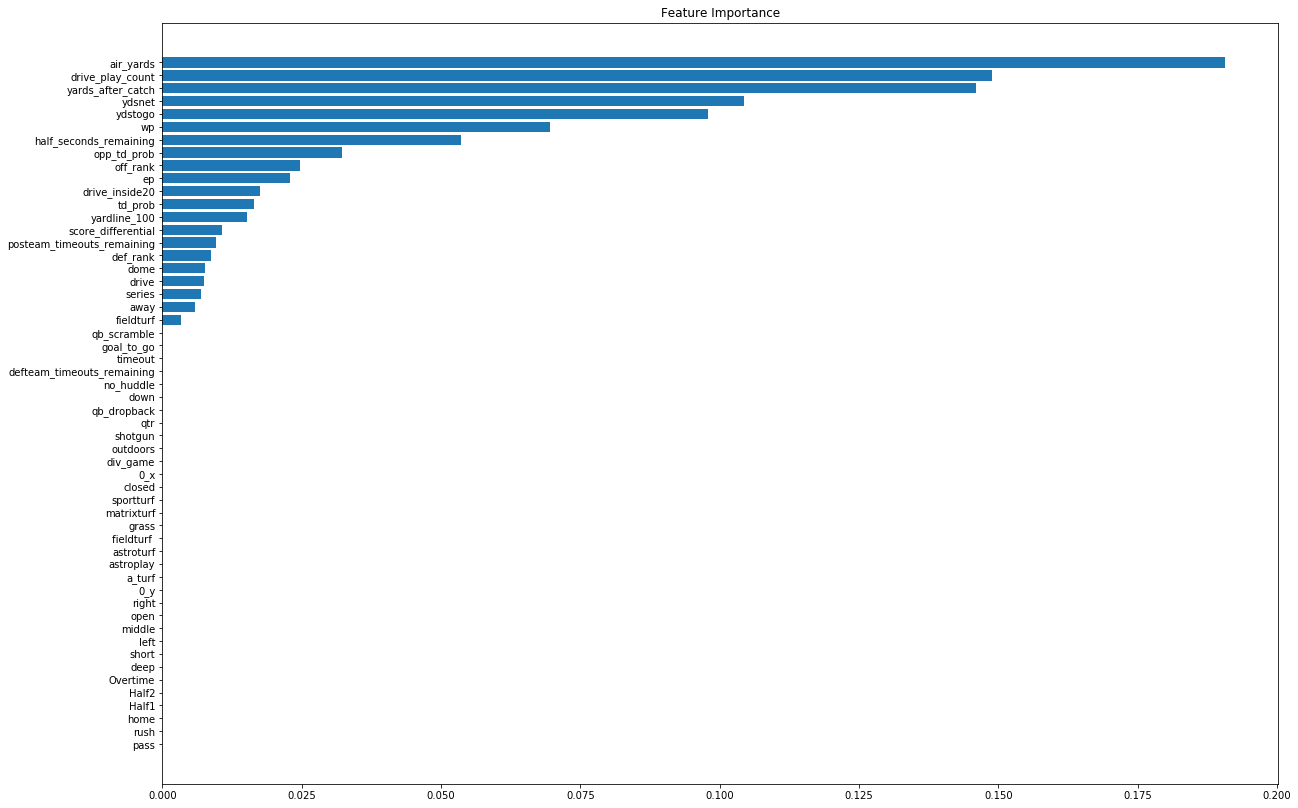

In [50]:
# creating list of column names
col_names = df.drop('success', axis=1).columns
feat_names= list(col_names)

# Sort feature importances in ascending order
indices = np.argsort(top_feats)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [feat_names[i] for i in indices]

# Create plot
plt.figure(figsize=(20,14))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.barh(range(X_train.shape[1]), top_feats[indices])

# Add feature names as x-axis labels
plt.yticks(range(X_train.shape[1]), names)

# Show plot
plt.show()

## Random Forest

### Use the ensemble method to see how it improves the model

In [51]:
rf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.922
Accuracy on test set: 0.861


In [52]:
top_feats = rf.feature_importances_
top_feats

array([0.02240798, 0.0334328 , 0.01421984, 0.00294757, 0.        ,
       0.00276112, 0.10517602, 0.13364947, 0.00183974, 0.00123049,
       0.        , 0.        , 0.14217683, 0.02917816, 0.00188007,
       0.01077991, 0.00618145, 0.02290512, 0.03559138, 0.05280185,
       0.02690374, 0.03424565, 0.01877288, 0.10973038, 0.08429316,
       0.00280731, 0.        , 0.        , 0.01508721, 0.01400963,
       0.00166083, 0.00343759, 0.00310314, 0.00178907, 0.0007139 ,
       0.01809263, 0.02137378, 0.00348362, 0.00084004, 0.0017116 ,
       0.        , 0.        , 0.00217916, 0.00321423, 0.00207262,
       0.00091323, 0.00017176, 0.00152373, 0.0003345 , 0.00152206,
       0.0014382 , 0.00233967, 0.00137353, 0.00170135])

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

rf_pred = rf.predict(X_test) #predictions 
score = f1_score(rf_pred, y_test) # F1 score 
rf_acc = accuracy_score(rf_pred, y_test) #Accuracy 

rf_eval = ['rf', score, rf_acc]
models = pd.DataFrame([rf_eval])
models

,0,1,2
0,rf,0.922318,0.860927


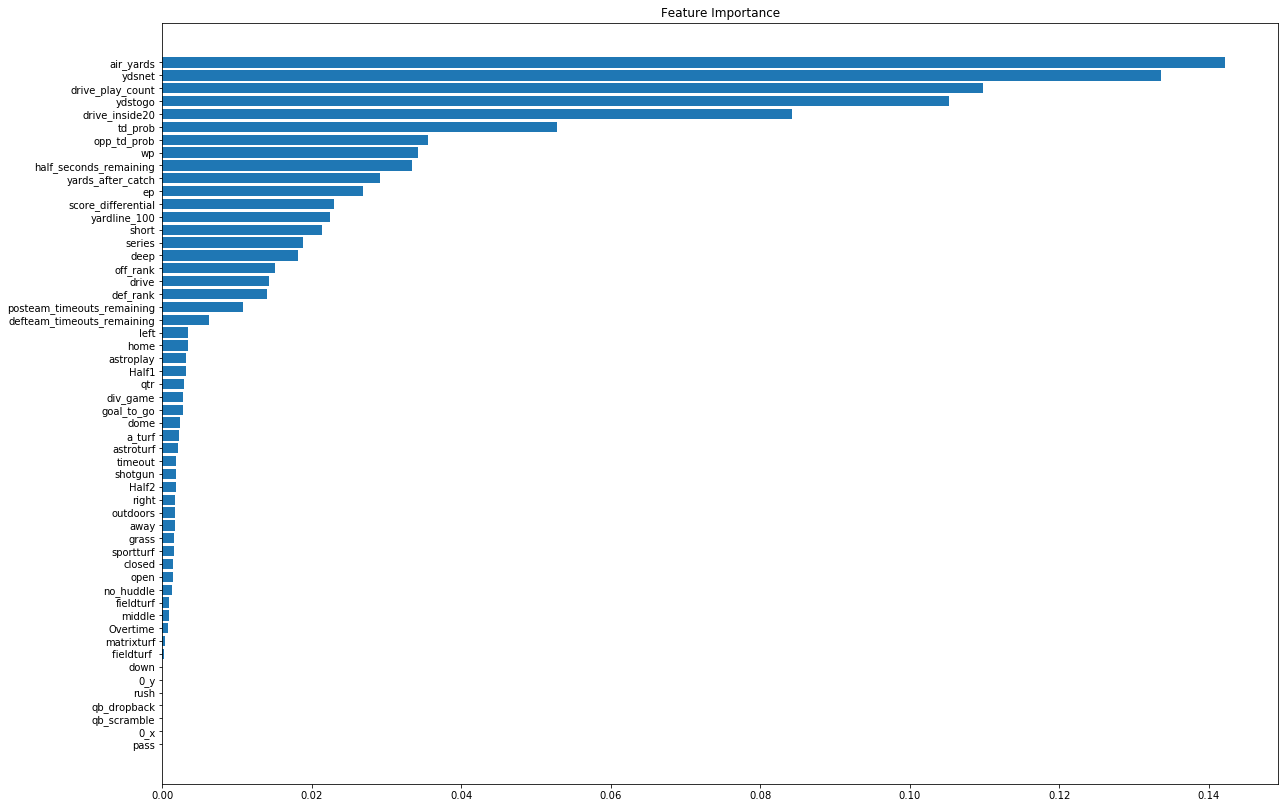

In [54]:
# creating list of column names
col_names = df.drop('success', axis=1).columns
feat_names= list(col_names)

# Sort feature importances in ascending order
indices = np.argsort(top_feats)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [feat_names[i] for i in indices]

# Create plot
plt.figure(figsize=(20,14))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.barh(range(X_train.shape[1]), top_feats[indices])

# Add feature names as x-axis labels
plt.yticks(range(X_train.shape[1]), names)

# Show plot
plt.show()

## Boost the Model

### Use Gradient Boost to increase the accuracy model

In [77]:
# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

In [78]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [79]:
# model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [80]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: Gradient Boosted Trees
Accuracy: 0.9943235572374646
F1-Score: 0.9967141292442497

Testing Metrics
Model: Gradient Boosted Trees
Accuracy: 0.9183222958057395
F1-Score: 0.9529860228716645


In [81]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[ 41,  33],
       [  4, 375]], dtype=int64)

In [82]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

         0.0       0.91      0.55      0.69        74
         1.0       0.92      0.99      0.95       379

    accuracy                           0.92       453
   macro avg       0.92      0.77      0.82       453
weighted avg       0.92      0.92      0.91       453



In [92]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X, y, cv=5).mean())

Mean GBT Cross-Val Score (k=5):
0.9470108635470267


## Vizualizations

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()